In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!pip install -v ktrain

Created temporary directory: /tmp/pip-ephem-wheel-cache-059nl9sb
Created temporary directory: /tmp/pip-req-tracker-2r1qci55
Created requirements tracker '/tmp/pip-req-tracker-2r1qci55'
Created temporary directory: /tmp/pip-install-301fqmuv
1 location(s) to search for versions of ktrain:
* https://pypi.org/simple/ktrain/
Getting page https://pypi.org/simple/ktrain/
Found index url https://pypi.org/simple
Looking up "https://pypi.org/simple/ktrain/" in the cache
Request header has "max_age" as 0, cache bypassed
Starting new HTTPS connection (1): pypi.org:443
https://pypi.org:443 "GET /simple/ktrain/ HTTP/1.1" 304 0
Analyzing links from page https://pypi.org/simple/ktrain/
  Found link https://files.pythonhosted.org/packages/52/77/692be43c750bf0cd1cc783666a571e52d44bf755abf6c7e4a39f9cd0f0fa/ktrain-0.1.1.tar.gz#sha256=f5ef347c79c7fd37ae537e4ef8dd9cf3a279e10d8472fcc12306fa387b13fc41 (from https://pypi.org/simple/ktrain/), version: 0.1.1
  Found link https://files.pythonhosted.org/packages/1

In [ ]:
import tensorflow as tf
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
print(tf.__version__)

2.1.0


In [ ]:
df_en_test = pd.read_csv('/content/drive/My Drive/abbyy/en_test')
df_ru_test = pd.read_csv('/content/drive/My Drive/abbyy/ru_test')
df_multi_train = pd.read_csv('/content/drive/My Drive/abbyy/multi_train')
df_multi_test = pd.read_csv('/content/drive/My Drive/abbyy/multi_test')
df_multi_train_balanced = pd.read_csv('/content/drive/My Drive/abbyy/multi_train_balanced')

In [ ]:
df_en_test.values.shape

(422, 3)

In [ ]:
target_names = np.unique(df_multi_train.target)
print(target_names)

['A1' 'A11' 'A12' 'A14' 'A16' 'A17' 'A22' 'A4' 'A7' 'A8' 'A9']


In [ ]:
X_train, X_test = df_multi_train['text'].values, df_multi_test['text'].values
y_train, y_test = df_multi_train['target'].values, df_multi_test['target'].values

X_train_balanced = df_multi_train_balanced['text'].values
y_train_balanced = df_multi_train_balanced['target'].values

X_test_ru = df_ru_test['text'].values
y_test_ru = df_ru_test['target'].values
X_test_en = df_en_test['text'].values
y_test_en = df_en_test['target'].values

In [ ]:
import ktrain
from ktrain import text

MODEL_NAME = 'bert-base-multilingual-cased'
t = text.Transformer(MODEL_NAME, maxlen=500, classes=target_names)
trn = t.preprocess_train(X_train, y_train)
val = t.preprocess_test(X_test, y_test)
model = t.get_classifier()
learner = ktrain.get_learner(model, train_data=trn, val_data=val, batch_size=6)

/usr/local/lib/python3.6/dist-packages/ktrain/text/preprocessor.py:399: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  warnings.warn('The class_names argument is replacing the classes argument. Please update your code.')


preprocessing train...
language: en
train sequence lengths:
	mean : 1339
	95percentile : 4775
	99percentile : 10948


/usr/local/lib/python3.6/dist-packages/ktrain/text/preprocessor.py:521: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  if self.get_classes(): warnings.warn('class_names argument was ignored, as they were extracted from string labels in dataset')


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 1386
	95percentile : 5579
	99percentile : 13425


In [ ]:
learner.fit_onecycle(5e-5, 5)



begin training using onecycle policy with max lr of 5e-05...
Train for 452 steps, validate for 29 steps
Epoch 1/5
452/452 [==============================] - 246s 545ms/step - loss: 1.5996 - accuracy: 0.5002 - val_loss: 1.1131 - val_accuracy: 0.6343
Epoch 2/5
452/452 [==============================] - 227s 501ms/step - loss: 0.9714 - accuracy: 0.6913 - val_loss: 0.9427 - val_accuracy: 0.6917
Epoch 3/5
452/452 [==============================] - 227s 501ms/step - loss: 0.7770 - accuracy: 0.7573 - val_loss: 0.9910 - val_accuracy: 0.6840
Epoch 4/5
452/452 [==============================] - 226s 501ms/step - loss: 0.4113 - accuracy: 0.8735 - val_loss: 0.8325 - val_accuracy: 0.7381
Epoch 5/5
452/452 [==============================] - 226s 501ms/step - loss: 0.1528 - accuracy: 0.9591 - val_loss: 0.8758 - val_accuracy: 0.7624


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [ ]:
def label_to_num(labels):
  result = np.zeros_like(labels)
  for cat_id, cat_label in enumerate(target_names):
    result[labels == cat_label] = cat_id
  return result

In [ ]:
y_test_number = label_to_num(y_test)
y_test_number_ru = label_to_num(y_test_ru)
y_test_number_en = label_to_num(y_test_en)

In [ ]:
print(y_test_number_en)


print(type(y_test_number_en))

[6 8 0 2 0 10 7 2 2 9 0 8 2 2 10 2 3 0 2 10 2 3 1 6 4 8 1 0 2 6 0 8 4 1 6
 0 0 2 5 8 8 3 8 9 6 0 7 4 2 1 4 0 2 6 0 9 6 2 0 0 0 9 2 9 5 10 6 0 7 2 10
 8 10 0 6 7 0 0 0 1 4 0 6 2 0 2 6 2 3 0 0 2 2 7 4 0 0 9 0 1 7 3 7 8 0 4 9
 1 8 8 0 9 2 0 8 0 2 6 6 7 1 1 1 0 2 7 0 7 2 0 8 4 0 8 5 2 3 3 0 0 2 0 9 7
 0 0 0 1 0 8 9 2 5 8 3 9 8 1 0 0 2 0 5 2 0 8 4 0 8 2 0 0 0 0 4 8 0 2 4 9 9
 2 4 0 10 4 6 9 4 5 9 4 4 4 2 5 3 10 5 3 8 2 1 6 6 5 1 4 0 4 0 8 6 0 4 2 6
 2 0 2 0 4 2 0 5 3 8 8 0 0 7 6 9 10 9 1 4 0 1 4 3 9 9 2 0 0 0 4 9 4 10 8 4
 10 8 2 0 2 4 10 2 4 5 4 4 8 9 2 8 8 6 0 0 8 2 2 9 4 1 2 1 0 4 5 8 0 3 1 0
 10 0 8 0 2 5 0 4 1 6 2 0 9 3 8 1 7 6 4 4 1 2 1 8 8 6 0 0 9 8 3 0 0 1 0 3
 5 6 0 2 6 6 7 0 9 10 2 2 6 5 0 2 6 6 8 8 8 5 7 2 6 2 3 4 6 1 3 1 0 0 4 2
 8 0 6 2 9 8 5 9 2 8 0 5 7 0 10 1 1 6 9 4 8 5 10 2 9 0 8 4 7 8 6 2 7 8 2 3
 9 9 0 0 6 9 8 2 8 0 9 2 3 0 2 9 8 8 8 0 2 10 0 2 0]
<class 'numpy.ndarray'>


In [ ]:
learner.save_model('/content/drive/My Drive/nonthematic_classification/bert_baseline')

In [ ]:
learner.model.save_weights('/content/drive/My Drive/nonthematic_classification/bert_baseline')

## Reload model

In [ ]:
LOAD_MODEL_NAME = 'bert-base-multilingual-cased'
load_t = text.Transformer(MODEL_NAME, maxlen=500, classes=target_names)
load_trn = load_t.preprocess_train(X_train, y_train)
load_val = load_t.preprocess_test(X_test, y_test)
load_model = load_t.get_classifier()

/usr/local/lib/python3.6/dist-packages/ktrain/text/preprocessor.py:399: UserWarning: The class_names argument is replacing the classes argument. Please update your code.
  warnings.warn('The class_names argument is replacing the classes argument. Please update your code.')


preprocessing train...
language: en
train sequence lengths:
	mean : 1339
	95percentile : 4775
	99percentile : 10948


/usr/local/lib/python3.6/dist-packages/ktrain/text/preprocessor.py:521: UserWarning: class_names argument was ignored, as they were extracted from string labels in dataset
  if self.get_classes(): warnings.warn('class_names argument was ignored, as they were extracted from string labels in dataset')


Is Multi-Label? False
preprocessing test...
language: en
test sequence lengths:
	mean : 1386
	95percentile : 5579
	99percentile : 13425


In [ ]:
load_model.load_weights('/content/drive/My Drive/nonthematic_classification/bert_baseline')

In [ ]:
load_learner = ktrain.get_learner(load_model, train_data=trn, val_data=val, batch_size=6)

In [ ]:
val_ru = t.preprocess_test(X_test_ru, y_test_number_ru)
val_en = t.preprocess_test(X_test_en, y_test_number_en)

preprocessing test...
language: en
test sequence lengths:
	mean : 1381
	95percentile : 5573
	99percentile : 17484


preprocessing test...
language: en
test sequence lengths:
	mean : 1391
	95percentile : 5569
	99percentile : 9833


In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

def evaluate_learner(my_learner, val_data, y_true):
  print("___________________")
  y_true = y_true.astype(int)
  results = my_learner.predict(val_data)
  model_pred = np.argmax(results, axis=1).astype(int)
  print("accuracy", accuracy_score(model_pred, y_true))
  cm = confusion_matrix(model_pred, y_true)
  sums = np.sum(cm, axis=1)
  normed_cm = (cm.T / sums).T
  print(normed_cm)
  sns.heatmap(normed_cm)

  #discPred = (np.sum(np.logical_and(y_true == 0, binary == 0)), np.sum(np.logical_and(y_true == 0, binary == 1)))
  #infoPred = (np.sum(np.logical_and(y_true == 1, binary == 0)), np.sum(np.logical_and(y_true == 1, binary == 1)))
  #fig, ax = plt.subplots()
  #ind = np.arange(2)    # the x locations for the groups
  #width = 0.35         # the width of the bars
  #p1 = ax.bar(ind, discPred, width, bottom=0)
  #p2 = ax.bar(ind + width, infoPred, width, bottom=0)

  #ax.set_title('Classification Labels')
  #ax.set_xticks(ind + width / 2)
  #ax.set_xticklabels(('actual=discussion', 'actual=info'))
  #ax.legend((p1[0], p2[0]), ('discussion', 'info'))
  #ax.autoscale_view()
  #plt.show()

def evaluate_multi(my_learner):
  evaluate_learner(my_learner, val, np.array(y_test_number))

def evaluate_ru(my_learner):
  evaluate_learner(my_learner, val_ru, y_test_number_ru)

def evaluate_en(my_learner):
  evaluate_learner(my_learner, val_en, y_test_number_en)

___________________
accuracy 0.7624309392265194
[[0.69325153 0.04907975 0.04907975 0.03680982 0.01840491 0.01840491
  0.03067485 0.00613497 0.04907975 0.04294479 0.00613497]
 [0.1        0.64444444 0.01111111 0.02222222 0.         0.11111111
  0.01111111 0.06666667 0.01111111 0.02222222 0.        ]
 [0.03703704 0.00740741 0.84444444 0.         0.01481481 0.01481481
  0.01481481 0.         0.02222222 0.03703704 0.00740741]
 [0.06557377 0.         0.01639344 0.83606557 0.06557377 0.
  0.         0.         0.01639344 0.         0.        ]
 [0.14666667 0.         0.08       0.06666667 0.6        0.01333333
  0.         0.02666667 0.01333333 0.04       0.01333333]
 [0.06521739 0.06521739 0.04347826 0.         0.04347826 0.76086957
  0.02173913 0.         0.         0.         0.        ]
 [0.         0.03448276 0.10344828 0.         0.03448276 0.03448276
  0.79310345 0.         0.         0.         0.        ]
 [0.05882353 0.08823529 0.         0.         0.         0.
  0.         0.823

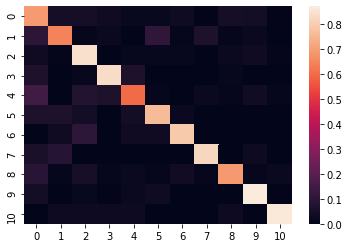

In [ ]:
evaluate_multi(load_learner)

['A1' 'A11' 'A12' 'A14' 'A16' 'A17' 'A22' 'A4' 'A7' 'A8' 'A9']